In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
[train.shape, test.shape]

[(891, 12), (418, 11)]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
df=pd.concat([train.drop(['Survived'], axis=1), test])

In [7]:
df.shape

(1309, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [9]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


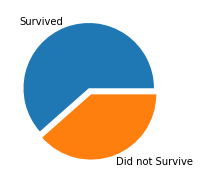

In [32]:
fig, ax = plt.subplots(figsize=(5,3))
plt.pie(x=train["Survived"].value_counts(), labels=["Survived","Did not Survive"], explode = (0, 0.1))
plt.show()

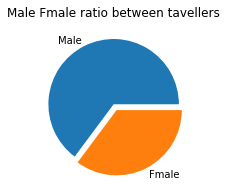

In [33]:
fig, ax = plt.subplots(figsize=(5,3))
plt.pie(x=train["Sex"].value_counts(), labels=["Male","Fmale"], explode = (0, 0.1))
plt.title('Male Fmale ratio between tavellers')
plt.show()

In [12]:
data=train.copy()

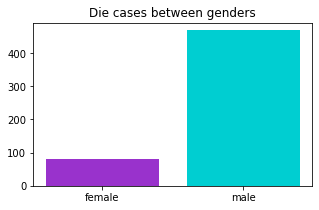

In [13]:
df1=data[data['Survived']==0].groupby('Sex').count()['Survived']
plt.figure(figsize=(5,3))
plt.bar(df1.index, df1.values, color=['darkorchid', 'darkturquoise'])  
plt.title('Die cases between genders')
plt.show()

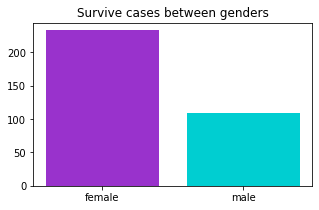

In [14]:
df1=data[data['Survived']==1].groupby('Sex').count()['Survived']
plt.figure(figsize=(5,3))
plt.bar(df1.index, df1.values, color=['darkorchid', 'darkturquoise'])  
plt.title('Survive cases between genders')
plt.show()

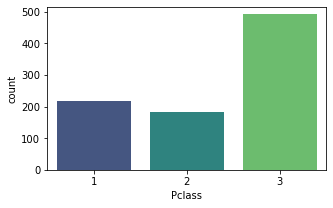

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(x=data["Pclass"], palette='viridis')
plt.show()

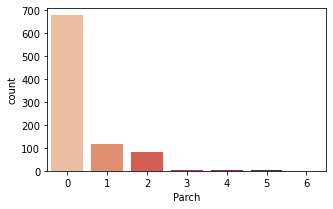

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(x=data["Parch"], palette='rocket_r')
plt.show()

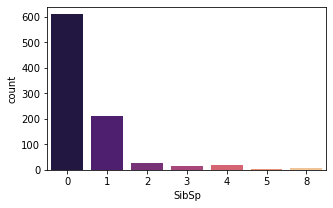

In [17]:
plt.figure(figsize=(5,3))
sns.countplot(x=data["SibSp"], palette='magma')
plt.show()

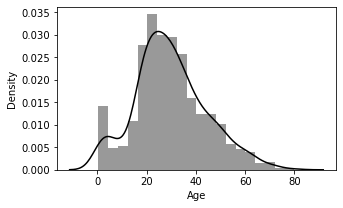

In [18]:
plt.figure(figsize=(5,3))
sns.distplot(data["Age"], color='black')
plt.show()

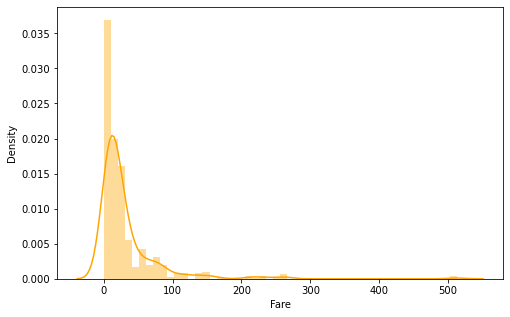

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(data["Fare"], color='orange')
plt.show()

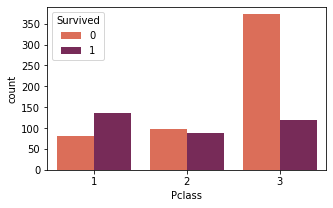

In [20]:
plt.figure(figsize=(5,3))
sns.countplot(data['Pclass'], hue = data['Survived'], palette="rocket_r")
plt.show()

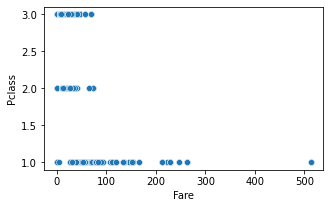

In [21]:
plt.figure(figsize=(5,3))
sns.scatterplot(x= data['Fare'], y=data['Pclass'])
plt.show()

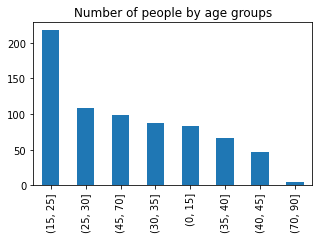

In [22]:
data.age_group = pd.cut(x=data['Age'], bins=[0,15, 25, 30, 35, 40, 45, 70, 90], ).astype("O")
plt.figure(figsize=(5,3))
plt.title('Number of people by age groups')
plt.xticks(rotation=180)
data.age_group.value_counts().plot.bar()
plt.show()

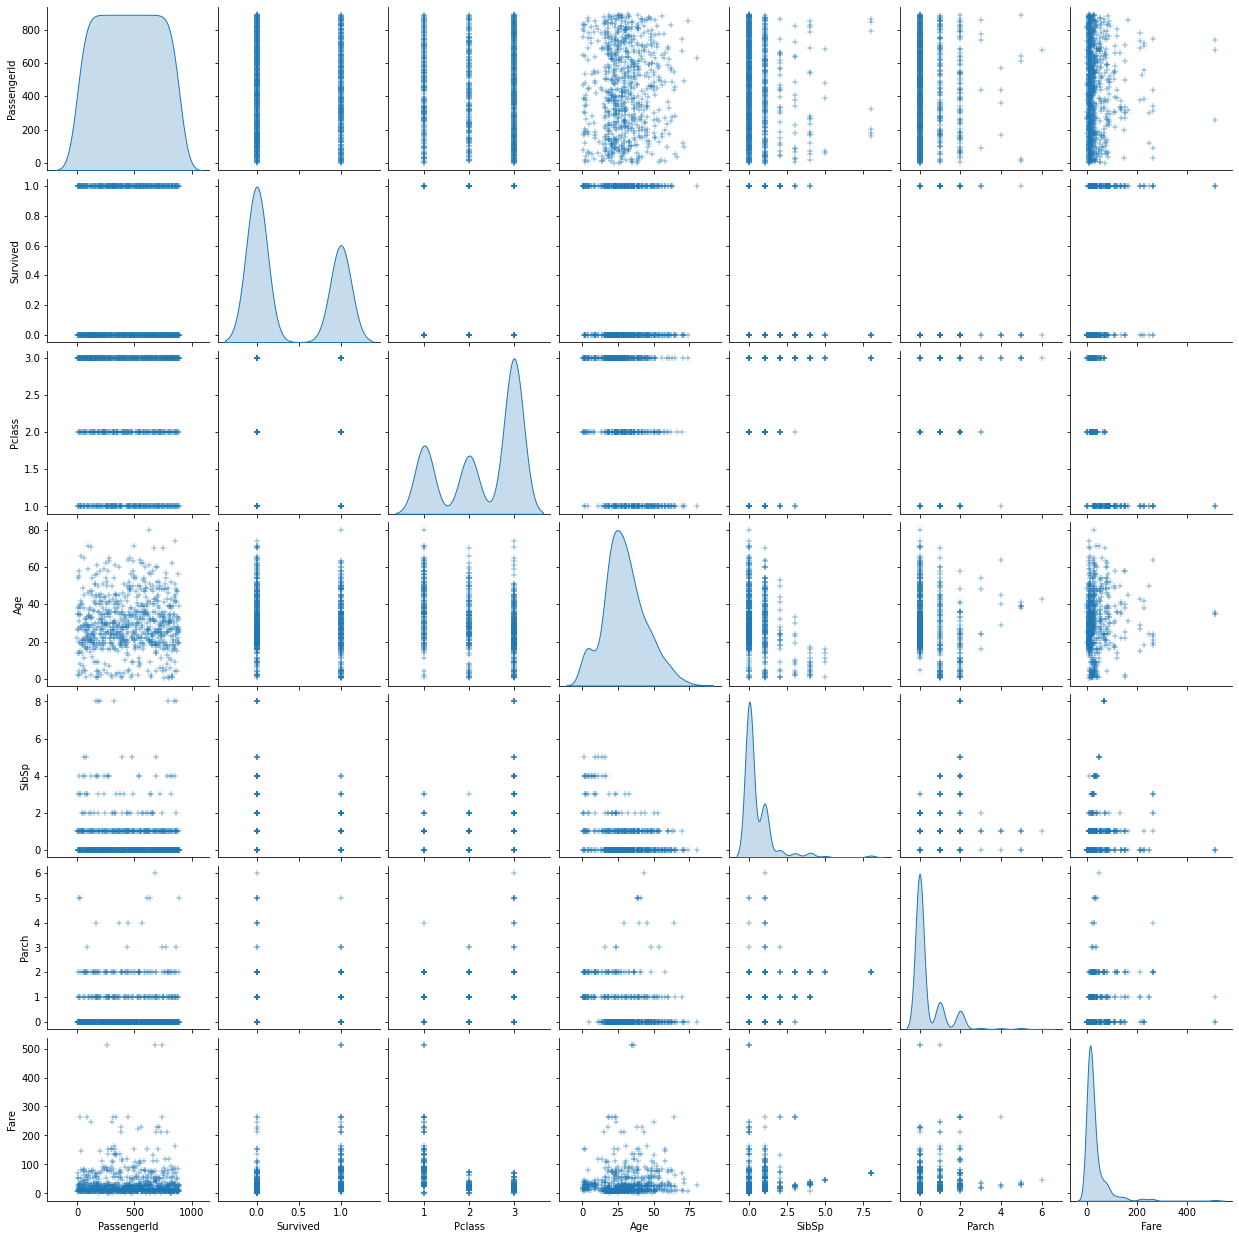

In [23]:
sns.pairplot(data, diag_kind='kde', markers='+')

# Outlier Detection

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


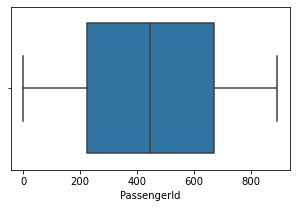

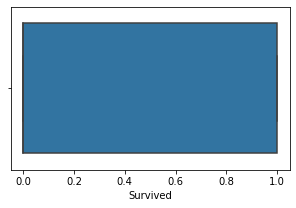

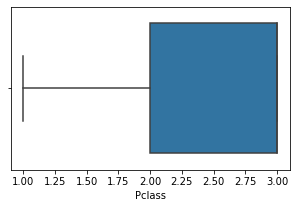

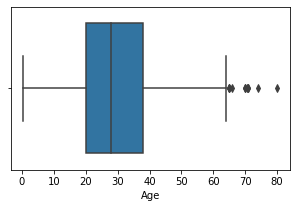

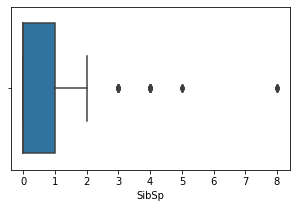

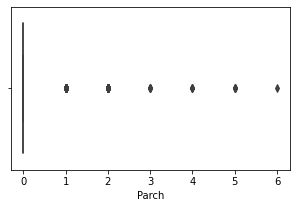

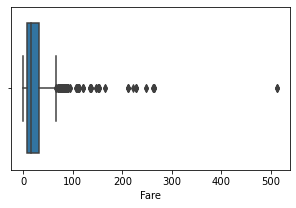

In [25]:
for i in train._get_numeric_data().columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(train[i], data=train)
    plt.show()

In [3]:
train=train[train['Fare']<train['Fare'].max()]

In [4]:
train=train[train['SibSp']<train['SibSp'].max()]

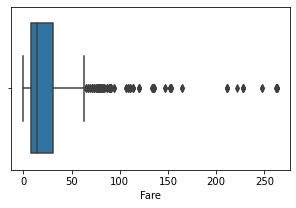

In [5]:
plt.figure(figsize=(5,3))
sns.boxplot(train['Fare'], data=train)
plt.show()

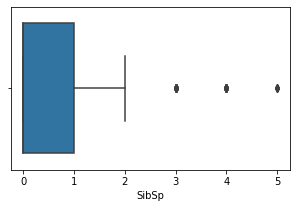

In [6]:
plt.figure(figsize=(5,3))
sns.boxplot(train['SibSp'], data=train)
plt.show()

# Missing Values 

In [34]:
nulls = train.isnull().sum()
print(nulls[nulls > 0])

Age         170
Cabin       679
Embarked      2
dtype: int64


In [35]:
nulls = train.isnull().sum()/train.shape[0]
print(nulls[nulls > 0])

Age         0.192963
Cabin       0.770715
Embarked    0.002270
dtype: float64


In [36]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Filling 2 Null value with most frequent

In [7]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].value_counts().sort_values(ascending=False).index[0])

In [8]:
nulls = train.isnull().sum()
print(nulls[nulls > 0])

Age      170
Cabin    679
dtype: int64


In [9]:
#More than 75% of cabin data is missing
train=train.drop('Cabin', axis=1)

In [10]:
nulls = train.isnull().sum()
print(nulls[nulls > 0])

Age    170
dtype: int64


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,881.0,445.331442,256.922510,1.00,224.0000,446.0000,666.0,891.0
Survived,881.0,0.384790,0.486822,0.00,0.0000,0.0000,1.0,1.0
Pclass,881.0,2.307605,0.835055,1.00,2.0000,3.0000,3.0,3.0
Age,711.0,29.675345,14.552495,0.42,20.0000,28.0000,38.0,80.0
SibSp,881.0,0.465380,0.883687,0.00,0.0000,0.0000,1.0,5.0
Parch,881.0,0.368899,0.797088,0.00,0.0000,0.0000,0.0,6.0
Fare,881.0,30.272544,41.192295,0.00,7.8958,14.4542,30.5,263.0


Std value of Fare column is high

In [12]:
quartile1 = train['Fare'].quantile(0)
quartile3 = train['Fare'].quantile(0.8)
IQR = quartile3 - quartile1
up_limit = quartile3 + 1.5 * IQR
low_limit = quartile1 - 1.5 * IQR
print(f'Low limit: {low_limit}\nUp limit: {up_limit}')

Low limit: -58.5
Up limit: 97.5


In [13]:
print(train[(train['Fare']<low_limit) | (train['Fare']>up_limit)].shape[0])

50


In [14]:
train.loc[(train['Fare'] < low_limit), 'Fare'] = low_limit
train.loc[(train['Fare'] > up_limit), 'Fare'] = up_limit

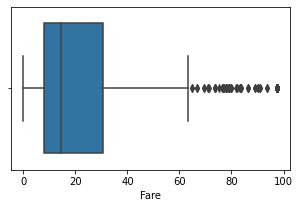

In [15]:
plt.figure(figsize=(5,3))
sns.boxplot(train['Fare'], data=train)
plt.show()

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,881.0,445.331442,256.922510,1.00,224.0000,446.0000,666.0,891.0
Survived,881.0,0.384790,0.486822,0.00,0.0000,0.0000,1.0,1.0
Pclass,881.0,2.307605,0.835055,1.00,2.0000,3.0000,3.0,3.0
Age,711.0,29.675345,14.552495,0.42,20.0000,28.0000,38.0,80.0
SibSp,881.0,0.465380,0.883687,0.00,0.0000,0.0000,1.0,5.0
Parch,881.0,0.368899,0.797088,0.00,0.0000,0.0000,0.0,6.0
Fare,881.0,26.298931,26.459963,0.00,7.8958,14.4542,30.5,97.5


Now std is less than previus

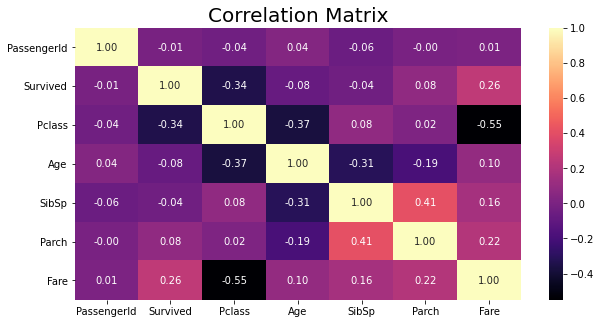

In [47]:
f, ax = plt.subplots(figsize= [10,5])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [17]:
def find_corr(df, num_col_names, limit=0.5):
    high_corrs={}
    for col in num_col_names:
        if col=='Survived':
            pass
        else:
            corr=df[[col, 'Survived']].corr().loc[col, 'Survived']
            print(col, corr)
            if abs(corr)>limit:
                high_corrs[col]=corr
    return high_corrs

In [18]:
high_corrs = find_corr(train, train._get_numeric_data().columns)

PassengerId -0.0060904896295406906
Pclass -0.33062545165654
Age -0.0794721831304759
SibSp 0.011189597843633678
Parch 0.09647328509182442
Fare 0.326332529272998


In [19]:
print(high_corrs)

{}


No columns with high correlation

# Encoding

In [20]:
train=train.drop(['PassengerId'], axis=1)

In [21]:
def object_cols(df):    
    ob_cols=[col for col in df.columns if df[col].dtype=='O']
    return ob_cols

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [23]:
le=LabelEncoder()
ohe=OneHotEncoder()

In [24]:
train = pd.get_dummies(train, columns=object_cols(train), drop_first=True)

In [25]:
from sklearn.impute import KNNImputer

In [26]:
def knn_imputer(df, n):
    imputer = KNNImputer(n_neighbors = n)
    df_filled = imputer.fit_transform(df)
    df_knn_imp = pd.DataFrame(df_filled,columns = df.columns)
    return df_knn_imp

In [27]:
train=knn_imputer(train, 4)

In [28]:
print(train.isnull().sum().sum()==0)

True


# Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [31]:
Y=train['Survived']
X=train.drop(['Survived'], axis=1)
print(Y.shape, X.shape)

(881,) (881, 1566)


In [32]:
def best_randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i, stratify=y)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [33]:
randomstate=best_randomstate(X,Y)
randomstate

5

In [39]:
model_parameters={
    'Logistic Regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {'C': list(range(1,50))}},
    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': list(range(1,50))}},
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {'criterion': ['gini','entropy']}}, 
    'Support Vector Machine': {
        'model': svm.SVC(gamma='scale'),
        'params': {'C': list(range(1,10))+ [0.1, 0.5], 'kernel': ['rbf','linear', 'poly']}},
    'Ada Boost Classifier': {
        'model': AdaBoostClassifier(), 
        'params': {'n_estimators': list(range(40,60)), 'algorithm': ['SAMME', 'SAMME.R']}},
    'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(), 
        'params': {'n_estimators': list(range(100, 102)), 'criterion': ['friedman_mse', 'mse', 'mae']}},
    'XGBoost Classifier': {
        'model': XGBClassifier(),
        'params': {'gamma': list(range(0,3)), 'max_depth': list(range(1,3))}},
}

In [40]:
def performance(model_name, acc_score, prec_score, rec_score, auc_roc_score):
    print(model_name)
    print(f'Accuracy score: {acc_score}')
    print(f'Precision score: {prec_score}')
    print(f'Recall score: {rec_score}')
    print(f'Aoc Roc score: {auc_roc_score}')
    print('---------------------------------------')

In [41]:
def classification_models(x,y, model_params):
    results=[]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=randomstate, stratify=Y)  
    for model_name, mp in model_params.items():
        clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
        clf.fit(X_train, Y_train)
        Y_train_pred=clf.predict(X_test)
        acc_score=np.round(accuracy_score(Y_train_pred, Y_test), 4)
        prec_score=np.round(precision_score(Y_train_pred, Y_test), 4)
        rec_score=np.round(recall_score(Y_train_pred, Y_test), 4)
        auc_roc_score=np.round(roc_auc_score(Y_train_pred, Y_test), 4)
        results.append({'model': model_name, 
                        'accuracy_score': acc_score,
                        'precision_score': prec_score,
                        'recall_score': rec_score,
                        'auc_roc_score': auc_roc_score,
                        'best_score': clf.best_score_,
                        'best_params': clf.best_params_})
        performance(model_name, acc_score, prec_score, rec_score, auc_roc_score)
    return results

In [42]:
scores = classification_models(X, Y, model_parameters)

Logistic Regression
Accuracy score: 0.8814
Precision score: 0.7794
Recall score: 0.8983
Aoc Roc score: 0.8856
---------------------------------------
Random Forest Classifier
Accuracy score: 0.8418
Precision score: 0.6765
Recall score: 0.8846
Aoc Roc score: 0.8543
---------------------------------------
Decision Tree Classifier
Accuracy score: 0.8531
Precision score: 0.7647
Recall score: 0.8387
Aoc Roc score: 0.8498
---------------------------------------
Support Vector Machine
Accuracy score: 0.8757
Precision score: 0.7647
Recall score: 0.8966
Aoc Roc score: 0.881
---------------------------------------
Ada Boost Classifier
Accuracy score: 0.8418
Precision score: 0.7059
Recall score: 0.8571
Aoc Roc score: 0.8459
---------------------------------------
Gradient Boosting Classifier
Accuracy score: 0.8418
Precision score: 0.6912
Recall score: 0.8704
Aoc Roc score: 0.8498
---------------------------------------
[18:11:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the def

[18:11:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:11:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier
Accuracy score: 0.8418
Precision score: 0.7206
Recall score: 0.8448
Aoc Roc score: 0.8426
---------------------------------------


In [43]:
res = pd.DataFrame(scores, columns=['model','accuracy_score', 'precision_score', 'recall_score', 'auc_roc_score', 'best_score', 'best_params'])
res.sort_values('accuracy_score', ascending = False).reset_index(drop=True)

,model,accuracy_score,precision_score,recall_score,auc_roc_score,best_score,best_params
0,Logistic Regression,0.8814,0.7794,0.8983,0.8856,0.805481,{'C': 47}
1,Support Vector Machine,0.8757,0.7647,0.8966,0.8810,0.814002,"{'C': 2, 'kernel': 'linear'}"
2,Decision Tree Classifier,0.8531,0.7647,0.8387,0.8498,0.823901,{'criterion': 'gini'}
3,Random Forest Classifier,0.8418,0.6765,0.8846,0.8543,0.836677,{'n_estimators': 43}
4,Ada Boost Classifier,0.8418,0.7059,0.8571,0.8459,0.816778,"{'algorithm': 'SAMME.R', 'n_estimators': 57}"
5,Gradient Boosting Classifier,0.8418,0.6912,0.8704,0.8498,0.826748,"{'criterion': 'mse', 'n_estimators': 100}"
6,XGBoost Classifier,0.8418,0.7206,0.8448,0.8426,0.826717,"{'gamma': 0, 'max_depth': 2}"


# Finalizing The Model

Best result is Logistig Regression with 0.8814 accuracy score

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=randomstate, stratify=Y)
model=LogisticRegression(solver='liblinear', multi_class='auto', C=47)
model.fit(X_train, Y_train)
Y_train_pred=model.predict(X_test)
performance('Logistic Regression', np.round(accuracy_score(Y_train_pred, Y_test), 4), 
                                   np.round(precision_score(Y_train_pred, Y_test), 4), 
                                   np.round(recall_score(Y_train_pred, Y_test), 4), 
                                   np.round(roc_auc_score(Y_train_pred, Y_test), 4))

Logistic Regression
Accuracy score: 0.8814
Precision score: 0.7794
Recall score: 0.8983
Aoc Roc score: 0.8856
---------------------------------------
